In [1]:
import requests
from bs4 import BeautifulSoup
import praw

In [2]:
reddit = praw.Reddit(client_id='rEu9sJcGOXVlfg', client_secret='XQTnU4GHi525lH5lYuKaXre98RA', user_agent='construction')

In [3]:

hot_posts = reddit.subreddit('ProductManagement')



In [ ]:

import pandas as pd
posts = []

for post in hot_posts.top(limit=1000):
    submission = reddit.submission(id=post.id)
    com_body = []
    for top_level_comment in submission.comments:
        com_body.append(top_level_comment.body)
    com_text = ' '.join(com_body)
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,com_text])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created', 'top_comments'])

In [8]:
c_safety =0
c_corona =0
safe_lst = []
cor_lst =[]
for i in range(posts.shape[0]):
    if ("safe" in posts.loc[i,"top_comments"].lower()):
        c_safety =c_safety+1
        safe_lst.append(i)
    if (("corona" in posts.loc[i,"top_comments"].lower()) or ("covid" in posts.loc[i,"title"].lower()) or ("virus" in posts.loc[i,"title"].lower())):
        c_corona =c_corona+1
        cor_lst.append(i)

In [10]:

s = ' '.join(posts.loc[safe_lst,"top_comments"])


'"GC to coordinate" LPT: Let the engineer know that their details suck. A good engineer will listen and update them on future projects if they can. "GC to submit calculations and shop drawings for approval by structural"\n\nFuck you design it yourself Then they ignore your calls and laugh hysterically I\'m working on one right now where GC to submit submittals for all firestopping. Fine and dandy.\n\nExcept where arch wants a 3hr firewall to die into an unrated exterior metal curtain wall (PEMB) and it just isn\'t possible. Not even with an judgement by Hilti/3M. There are details for spandrels but this isn\'t that.\n\nSure the GC should have pointed that out earlier before building it but god-damn, open the firestopping book before drawing the impossible. As an engineer part of the problem is the 35% design/build proposal.\n\nBasically we take a design to 35% whereby it gets passed on to a D/B contractor to finish\n\nWhere it hurts is that it\'s difficult to figure how far to go on it

In [11]:
s = s.replace('\n',' ')
s = s.replace('"\"','')

'"GC to coordinate" LPT: Let the engineer know that their details suck. A good engineer will listen and update them on future projects if they can. "GC to submit calculations and shop drawings for approval by structural"  Fuck you design it yourself Then they ignore your calls and laugh hysterically I\'m working on one right now where GC to submit submittals for all firestopping. Fine and dandy.  Except where arch wants a 3hr firewall to die into an unrated exterior metal curtain wall (PEMB) and it just isn\'t possible. Not even with an judgement by Hilti/3M. There are details for spandrels but this isn\'t that.  Sure the GC should have pointed that out earlier before building it but god-damn, open the firestopping book before drawing the impossible. As an engineer part of the problem is the 35% design/build proposal.  Basically we take a design to 35% whereby it gets passed on to a D/B contractor to finish  Where it hurts is that it\'s difficult to figure how far to go on it because a

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

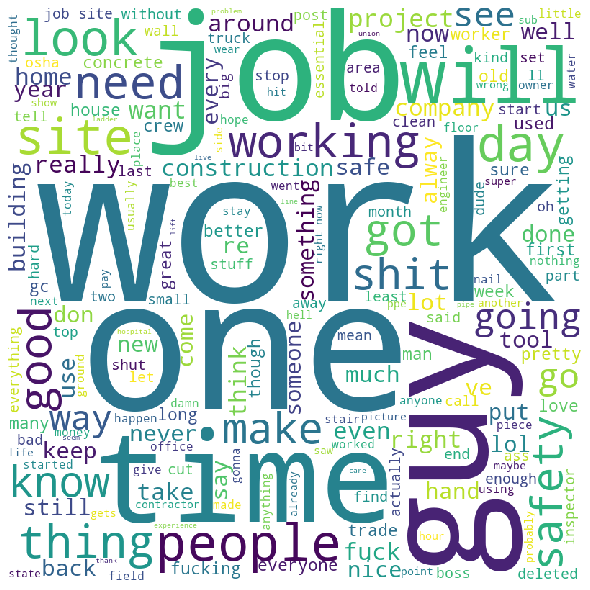

In [13]:
# split the value 
tokens = s.split() 
comment_words = ''
stopwords = set(STOPWORDS) 
# Converts each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 
      
comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [14]:
s_cor = ' '.join(posts.loc[cor_lst,"top_comments"])
s_cor= s_cor.replace('\n',' ')

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster=LancasterStemmer()


from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
# s_cor = lemmatizer.lemmatize(s_cor)

In [15]:
s_cor
s_cor = lancaster.stem(s_cor)
porter.stem(s_cor)

'hey man, i feel your pain. my unique problem has been that big sites deciding not to operate has put all of the smaller domestic jobs at the front of the line. which is putting like 25 dudes on my sites that would usually have me and my two guys on. my worksites are getting busier not quieter, australia is going alright atm but i am perplexed at the moment. i was working on a project that was pretty critical. i\'ve been pulled to a stupid one so a subcontractor can get in that space  i haven\'t decided if i\'m going to work today yet & i\'m supposed to leave in 45 minutes. i really don\'t know what to do. i won\'t lose the job if i stay home, but i just came off a long winter lay off. glad to see some people actually share this sentiment. sometimes you gotta say fuck it. my boss said if i don’t wanna work because of coronavirus can go work at burger king. i’m in chicago doing completely non essential demo work on a hotel that is being renovated. 10 of us wearing rubber gloves and goin

In [16]:
[lancaster.stem(word) for word in s_cor]

['h',
 'e',
 'y',
 ' ',
 'm',
 'a',
 'n',
 ',',
 ' ',
 'i',
 ' ',
 'f',
 'e',
 'e',
 'l',
 ' ',
 'y',
 'o',
 'u',
 'r',
 ' ',
 'p',
 'a',
 'i',
 'n',
 '.',
 ' ',
 'm',
 'y',
 ' ',
 'u',
 'n',
 'i',
 'q',
 'u',
 'e',
 ' ',
 'p',
 'r',
 'o',
 'b',
 'l',
 'e',
 'm',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'b',
 'e',
 'e',
 'n',
 ' ',
 't',
 'h',
 'a',
 't',
 ' ',
 'b',
 'i',
 'g',
 ' ',
 's',
 'i',
 't',
 'e',
 's',
 ' ',
 'd',
 'e',
 'c',
 'i',
 'd',
 'i',
 'n',
 'g',
 ' ',
 'n',
 'o',
 't',
 ' ',
 't',
 'o',
 ' ',
 'o',
 'p',
 'e',
 'r',
 'a',
 't',
 'e',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 't',
 ' ',
 'a',
 'l',
 'l',
 ' ',
 'o',
 'f',
 ' ',
 't',
 'h',
 'e',
 ' ',
 's',
 'm',
 'a',
 'l',
 'l',
 'e',
 'r',
 ' ',
 'd',
 'o',
 'm',
 'e',
 's',
 't',
 'i',
 'c',
 ' ',
 'j',
 'o',
 'b',
 's',
 ' ',
 'a',
 't',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'f',
 'r',
 'o',
 'n',
 't',
 ' ',
 'o',
 'f',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'l',
 'i',
 'n',
 'e',
 '.',
 ' ',
 'w',
 'h',
 'i',
 'c',
 'h',
 ' ',
 'i'

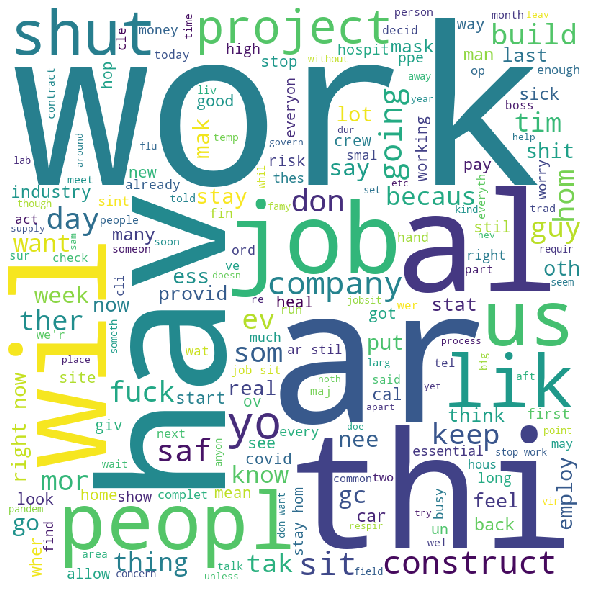

In [17]:
# split the value 
tokens = s_cor.split() 
comment_words = ''
stopwords = set(STOPWORDS) 
# Converts each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 
    tokens[i] = lancaster.stem(tokens[i])
      
comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [18]:
posts['is_corona'] =0
posts['is_safety'] =0
posts.loc[safe_lst,'is_safety'] =1
posts.loc[cor_lst,'is_corona'] =1
posts

,title,score,id,subreddit,url,num_comments,body,created,top_comments,is_corona,is_safety
0,"Means and methods, am I right?",1815,hd8us6,Construction,https://i.redd.it/v0y1asuq8a651.jpg,126,,1.592782e+09,"""GC to coordinate"" LPT: Let the engineer know ...",0,1
1,I saw that a couple of times,1272,gwl7qc,Construction,https://i.redd.it/oc3iuhf6bx251.jpg,123,,1.591318e+09,[deleted] To be fair wouldn't that really be t...,0,0
2,This is some truth. I do this. Not even a dad ...,1131,f4jtmn,Construction,https://i.redd.it/rm9mzg5927h41.jpg,84,,1.581848e+09,Every time I see a house I've worked on think ...,0,0
3,E.,1098,i3s77f,Construction,https://i.redd.it/60oojvztz1f51.jpg,66,,1.596605e+09,"Had a guy that used to say ""Well I sucked at m...",0,0
4,This is the only way i know of...,1063,fqvaf2,Construction,https://i.redd.it/cgs9c6x61ip41.jpg,54,,1.585467e+09,This made me laugh cause it’s so true Almost a...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,Fire Risk Assessment - Need advice please!,1,hr49ou,Constructionsafety,https://www.reddit.com/r/Constructionsafety/co...,2,"Hi guys, I was wondering if anyone could help...",1.594772e+09,>That restaurant had also undergone a fire ins...,0,1
996,Preparing Your Plumbing For Winter,1,ggbt9r,Constructionsafety,https://quintessentialplumbing.com.au/preparin...,0,,1.589042e+09,,0,0
997,I need help.,1,gbarrk,Constructionsafety,https://www.reddit.com/r/Constructionsafety/co...,2,Hey guys I’m new to this subreddit and Reddit ...,1.588333e+09,If he's still drinking then he's not recoverin...,0,0
998,Seriously?,1,gbalwn,Constructionsafety,https://i.redd.it/0ksvdwrvn2w41.jpg,0,,1.588332e+09,,0,0


In [19]:
sum(posts['is_safety'])
posts.to_excel("reddit_construction_safety.xlsx")

In [20]:
reason_lst = [['ppe','mask','protective gear','wear'],['distanc','6'],'temperature',['sanitiz','wash','soap'],'delay' ]
reason_cnt = [0,0,0,0,0]
for i,r in enumerate(reason_lst):
    for ele in r:
        reason_cnt[i] = reason_cnt[i]+comment_words.count(ele)

In [ ]:
reason_cnt
